In [1]:
# Import packages.
# Analyse the data.
import pandas as pd

# Get data from the internet.
import requests

# Parse data with BeautifulSoup.
from bs4 import BeautifulSoup

In [2]:
# Import the url.
# Create a variable to store the URL.
url = 'https://www.worldometers.info/coronavirus/'

# Create a vairable to store the information.
page = requests.get(url)

# Make contact with the website.
page

<Response [200]>

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
  <!-- Favicon -->
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/favicon/apple-icon-76x
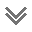

In [3]:
# Get the information from the website.
if page.status_code == 200:
    html_doc = page.text

# Look at the html code.
# Create a variable to store the HTML info. – allows us to parse the HTML code. 
soup = BeautifulSoup(html_doc)

# Print the output in a readable format.
print(soup.prettify())

In [7]:
# Navigate to the website and determine the table ID.
# Extract the contents of the table with the table ID.
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

# View the information in a readable format.
print(table.prettify())

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
 <thead>
  <tr>
   <th width="1%">
    #
   </th>
   <th width="100">
    Country,
    <br/>
    Other
   </th>
   <th width="20">
    Total
    <br/>
    Cases
   </th>
   <th width="30">
    New
    <br/>
    Cases
   </th>
   <th width="30">
    Total
    <br/>
    Deaths
   </th>
   <th width="30">
    New
    <br/>
    Deaths
   </th>
   <th width="30">
    Total
    <br/>
    Recovered
   </th>
   <th width="30">
    New
    <br/>
    Recovered
   </th>
   <th width="30">
    Active
    <br/>
    Cases
   </th>
   <th width="30">
    Serious,
    <br/>
    Critical
   </th>
   <th width="30">
    Tot Cases/
    <br/>
    1M pop
   </th>
   <th width="30">
    Deaths/
    <br/>
    1M pop
   </th>
   <th width="30">
    Total
    <br/>
    Tests
   </th>
   <th width="30">
    Tests/
    <br/>
    <nobr>
     1M pop
    <

In [8]:
# Find the table elements.
tables = soup.find_all('table')

# Show all the tables.
tables


[<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
 <thead>
 <tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deat

In [35]:
# All of the rows of the table.
rows = table.find_all('tr', attrs={'style': ""})

# View the rows.
rows

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world">
 <td></td>
 <td style="text-align:left;">World</td>
 <td>688,010,809</td>
 <td

In [36]:
# Store the extracted data.
# Create an empty list.
output = []

# Specify the column names.
column_names = ['ID', 'Country', 'Total Cases',
                'New Cases',
                'Total Deaths', 
                'New Deaths',
                'Total Recovered',
                'New Recovered',
                'Active Cases',
                'Serious, Critical',
                'Tot Cases/ 1M pop',
                'Deaths/ 1M pop',
                'Total Tests',
                'Tests/ 1M pop', 'Population']


# Create a for loop statement.
for country in rows:
    country_data = country.find_all('td')
    if country_data:
        # Extract the text within each element.
        country_text = [td.text for td in country_data]
        # Store data in a zip format for easy access.
        output.append(dict(zip(column_names, country_text)))
        
# Create a DataFrame directly from the output.
data = pd.DataFrame(output)

# View the DataFrame.
data

ID       Country  Total Cases New Cases  \
0                World  688,010,809   +23,578   
1      1           USA  106,772,583             
2      2         India   44,974,909             
3      3        France   40,022,993             
4      4       Germany   38,414,388             
..   ...           ...          ...       ...   
215  222  Saint Helena        2,166             
216  224    Montserrat        1,403             
217  230       Tokelau            5             
218  231         China      503,302             
219             Total:  688,010,809   +23,578   

                                  Total Deaths New Deaths Total Recovered  \
0                                    6,872,321        +23     660,437,970   
1    1,162,474                                                104,735,126   
2      531,722                                                 44,421,781   
3      166,862                                                 39,755,980   
4      173,544                                                 38,213,200   
..                                         ...        ...             ...   
215                                                                     2   
216          8                                                      1,376   
217                                                                         
218      5,272                                                    379,053   
219                                  6,872,321        +23     660,437,970   

    New Recovered Active Cases Serious, Critical Tot Cases/ 1M pop  \
0         +47,304   20,700,518            39,051            88,265   
1                      874,983             1,136           318,910   
2                       21,406               N/A            31,973   
3                      100,151               869           610,251   
4          +2,300       27,644               N/A           457,949   
..            ...          ...               ...               ...   
215                      2,164                             354,211   
216                         19                             282,578   
217                          5                               3,628   
218                    118,977               N/A               347   
219       +47,304   20,700,518            39,051          88,265.4   

    Deaths/ 1M pop    Total Tests Tests/ 1M pop  \
0            881.7                                
1            3,472  1,178,843,558     3,520,983   
2              378    927,909,833       659,668   
3            2,544    271,490,188     4,139,547   
4            2,069    122,332,384     1,458,359   
..             ...            ...           ...   
215                                               
216          1,611         17,762     3,577,442   
217                                               
218              4    160,000,000       110,461   
219          881.7                                

                                        Population  
0                                                   
1                                     334,805,269   
2                                   1,406,631,776   
3                                      65,584,518   
4                                      83,883,596   
..                                             ...  
215                                         6,115   
216                                         4,965   
217                                         1,378   
218  1,448,471,400                                  
219                                                 

[220 rows x 15 columns]

In [27]:
data2=data.query("Country == 'USA'")
data2

ID Country  Total Cases New Cases  \
8  1     USA  106,772,583             

                                Total Deaths New Deaths Total Recovered  \
8  1,162,474                                                104,735,126   

  New Recovered Active Cases Serious, Critical Tot Cases/ 1M pop  \
8                    874,983             1,136           318,910   

  Deaths/ 1M pop    Total Tests Tests/ 1M pop    Population  
8          3,472  1,178,843,558     3,520,983  334,805,269

In [28]:
pd.set_option('display.max_rows', None)
data

ID                 Country  Total Cases New Cases  \
0              \nNorth America\n  126,328,623             
1                       \nAsia\n  216,955,587   +23,521   
2                     \nEurope\n  249,053,583             
3              \nSouth America\n   68,625,990       +57   
4                    \nOceania\n   14,225,952             
5                     \nAfrica\n   12,820,353             
6                           \n\n          721             
7                          World  688,010,809   +23,578   
8      1                     USA  106,772,583             
9      2                   India   44,974,909             
10     3                  France   40,022,993             
11     4                 Germany   38,414,388             
12     5                  Brazil   37,511,921             
13     6                   Japan   33,803,572             
14     7                S. Korea   31,331,112   +23,521   
15     8                   Italy   25,809,208             
16     9                      UK   24,569,895             
17    10                  Russia   22,884,493             
18    11                  Turkey   17,232,066             
19    12                   Spain   13,845,825             
20    13                 Vietnam   11,580,060             
21    14               Australia   11,472,222             
22    15                  Taiwan   10,239,998             
23    16               Argentina   10,044,957             
24    17             Netherlands    8,610,372             
25    18                    Iran    7,607,744             
26    19                  Mexico    7,595,863             
27    20               Indonesia    6,790,405             
28    21                  Poland    6,514,997             
29    22                Colombia    6,365,262             
30    23                 Austria    6,069,984             
31    24                  Greece    6,018,544             
32    25                Portugal    5,581,619             
33    26                 Ukraine    5,529,459             
34    27                   Chile    5,285,533             
35    28                Malaysia    5,079,436             
36    29                  Israel    4,823,329             
37    30                 Belgium    4,795,081             
38    31                    DPRK    4,772,813             
39    32                Thailand    4,734,000             
40    33                  Canada    4,641,301             
41    34                 Czechia    4,640,905             
42    35                    Peru    4,503,222             
43    36             Switzerland    4,402,438             
44    37             Philippines    4,105,498             
45    38            South Africa    4,076,463             
46    39                 Romania    3,397,365             
47    40                 Denmark    3,181,024             
48    41               Hong Kong    2,894,776             
49    42                  Sweden    2,707,189             
50    43                  Serbia    2,537,580             
51    44                    Iraq    2,465,545             
52    45               Singapore    2,391,248             
53    46             New Zealand    2,336,352             
54    47                 Hungary    2,201,824             
55    48              Bangladesh    2,038,250             
56    49                Slovakia    1,866,647             
57    50                 Georgia    1,840,187             
58    51                  Jordan    1,746,997             
59    52                 Ireland    1,710,625             
60    53                Pakistan    1,580,900             
61    54                  Norway    1,483,454             
62    55                 Finland    1,475,378             
63    56              Kazakhstan    1,411,831             
64    57                Slovenia    1,343,491             
65    58               Lithuania    1,319,117             
66    59                Bulgaria    1,305,520        

In [29]:
data3=data.query("Country != 'Total:'")
data3

ID                 Country  Total Cases New Cases  \
0              \nNorth America\n  126,328,623             
1                       \nAsia\n  216,955,587   +23,521   
2                     \nEurope\n  249,053,583             
3              \nSouth America\n   68,625,990       +57   
4                    \nOceania\n   14,225,952             
5                     \nAfrica\n   12,820,353             
6                           \n\n          721             
7                          World  688,010,809   +23,578   
8      1                     USA  106,772,583             
9      2                   India   44,974,909             
10     3                  France   40,022,993             
11     4                 Germany   38,414,388             
12     5                  Brazil   37,511,921             
13     6                   Japan   33,803,572             
14     7                S. Korea   31,331,112   +23,521   
15     8                   Italy   25,809,208             
16     9                      UK   24,569,895             
17    10                  Russia   22,884,493             
18    11                  Turkey   17,232,066             
19    12                   Spain   13,845,825             
20    13                 Vietnam   11,580,060             
21    14               Australia   11,472,222             
22    15                  Taiwan   10,239,998             
23    16               Argentina   10,044,957             
24    17             Netherlands    8,610,372             
25    18                    Iran    7,607,744             
26    19                  Mexico    7,595,863             
27    20               Indonesia    6,790,405             
28    21                  Poland    6,514,997             
29    22                Colombia    6,365,262             
30    23                 Austria    6,069,984             
31    24                  Greece    6,018,544             
32    25                Portugal    5,581,619             
33    26                 Ukraine    5,529,459             
34    27                   Chile    5,285,533             
35    28                Malaysia    5,079,436             
36    29                  Israel    4,823,329             
37    30                 Belgium    4,795,081             
38    31                    DPRK    4,772,813             
39    32                Thailand    4,734,000             
40    33                  Canada    4,641,301             
41    34                 Czechia    4,640,905             
42    35                    Peru    4,503,222             
43    36             Switzerland    4,402,438             
44    37             Philippines    4,105,498             
45    38            South Africa    4,076,463             
46    39                 Romania    3,397,365             
47    40                 Denmark    3,181,024             
48    41               Hong Kong    2,894,776             
49    42                  Sweden    2,707,189             
50    43                  Serbia    2,537,580             
51    44                    Iraq    2,465,545             
52    45               Singapore    2,391,248             
53    46             New Zealand    2,336,352             
54    47                 Hungary    2,201,824             
55    48              Bangladesh    2,038,250             
56    49                Slovakia    1,866,647             
57    50                 Georgia    1,840,187             
58    51                  Jordan    1,746,997             
59    52                 Ireland    1,710,625             
60    53                Pakistan    1,580,900             
61    54                  Norway    1,483,454             
62    55                 Finland    1,475,378             
63    56              Kazakhstan    1,411,831             
64    57                Slovenia    1,343,491             
65    58               Lithuania    1,319,117             
66    59                Bulgaria    1,305,520        

In [30]:
pd.reset_option("max_rows")
data3

ID            Country  Total Cases New Cases  \
0         \nNorth America\n  126,328,623             
1                  \nAsia\n  216,955,587   +23,521   
2                \nEurope\n  249,053,583             
3         \nSouth America\n   68,625,990       +57   
4               \nOceania\n   14,225,952             
..   ...                ...          ...       ...   
234  227       Vatican City           29             
235  228     Western Sahara           10             
236  229         MS Zaandam            9             
237  230            Tokelau            5             
238  231              China      503,302             

                              Total Deaths New Deaths Total Recovered  \
0                                1,630,473                122,139,810   
1                                1,545,346        +23     200,736,735   
2                                2,055,351                244,962,025   
3                                1,354,928                 66,453,143   
4                                   27,464                 14,060,980   
..                                     ...        ...             ...   
234                                                                29   
235      1                                                          9   
236      2                                                          7   
237                                                                     
238  5,272                                                    379,053   

    New Recovered Active Cases Serious, Critical Tot Cases/ 1M pop  \
0                    2,558,340             6,302                     
1         +14,789   14,673,506            15,658                     
2         +31,928    2,036,207             6,325                     
3            +587      817,919            10,129                     
4                      137,508                89                     
..            ...          ...               ...               ...   
234                          0                              36,295   
235                          0                                  16   
236                          0                                       
237                          5                               3,628   
238                    118,977               N/A               347   

    Deaths/ 1M pop  Total Tests Tests/ 1M pop  \
0                                               
1                                               
2                                               
3                                               
4                                               
..             ...          ...           ...   
234                                             
235              2                              
236                                             
237                                             
238              4  160,000,000       110,461   

                                        Population  
0                                                   
1                                                   
2                                                   
3                                                   
4                                                   
..                                             ...  
234                                           799   
235                                       626,161   
236                                                 
237                                         1,378   
238  1,448,471,400                                  

[239 rows x 15 columns]

In [31]:
# Subset data with only relevant columns.
data_executives = data3[['ID', 'Country', 'Total Cases', 'Total Deaths']]

# View DataFrame.
data_executives

ID            Country  Total Cases  \
0         \nNorth America\n  126,328,623   
1                  \nAsia\n  216,955,587   
2                \nEurope\n  249,053,583   
3         \nSouth America\n   68,625,990   
4               \nOceania\n   14,225,952   
..   ...                ...          ...   
234  227       Vatican City           29   
235  228     Western Sahara           10   
236  229         MS Zaandam            9   
237  230            Tokelau            5   
238  231              China      503,302   

                              Total Deaths  
0                                1,630,473  
1                                1,545,346  
2                                2,055,351  
3                                1,354,928  
4                                   27,464  
..                                     ...  
234                                         
235      1                                  
236      2                                  
237                                         
238  5,272                                  

[239 rows x 4 columns]

In [32]:
# iterating the columns
for col in data3.columns:
    print(col)

ID
Country
Total Cases
New Cases
Total Deaths
New Deaths
Total Recovered
New Recovered
Active Cases
Serious, Critical
Tot Cases/ 1M pop
Deaths/ 1M pop
Total Tests
Tests/ 1M pop
Population


In [33]:
# Subset data with only relevant columns.
data_claims = data3[['ID', 'Country', 'New Cases', 'New Deaths', 'Active Cases', 'Serious, Critical']]

# View DataFrame.
data_claims

ID            Country New Cases New Deaths Active Cases  \
0         \nNorth America\n                         2,558,340   
1                  \nAsia\n   +23,521        +23   14,673,506   
2                \nEurope\n                         2,036,207   
3         \nSouth America\n       +57                 817,919   
4               \nOceania\n                           137,508   
..   ...                ...       ...        ...          ...   
234  227       Vatican City                                 0   
235  228     Western Sahara                                 0   
236  229         MS Zaandam                                 0   
237  230            Tokelau                                 5   
238  231              China                           118,977   

    Serious, Critical  
0               6,302  
1              15,658  
2               6,325  
3              10,129  
4                  89  
..                ...  
234                    
235                    
236                    
237                    
238               N/A  

[239 rows x 6 columns]

In [34]:
# Subset data with only relevant columns.
data_clients = data3[['ID', 'Country', 'Total Cases', 'Total Recovered']]

# View DataFrame.
data_clients

ID            Country  Total Cases Total Recovered
0         \nNorth America\n  126,328,623     122,139,810
1                  \nAsia\n  216,955,587     200,736,735
2                \nEurope\n  249,053,583     244,962,025
3         \nSouth America\n   68,625,990      66,453,143
4               \nOceania\n   14,225,952      14,060,980
..   ...                ...          ...             ...
234  227       Vatican City           29              29
235  228     Western Sahara           10               9
236  229         MS Zaandam            9               7
237  230            Tokelau            5                
238  231              China      503,302         379,053

[239 rows x 4 columns]